## Session on 24/1/2021

#### Seaborn 
* It is a library for making statistical graphics in Python. 
* It builds on top of matplotlib and integrates closely with pandas data structures.
* Seaborn helps you explore and understand your data.
* Its plotting functions operate on dataframes and arrays containing wholedatasets and produce informative plots.

#### Seaborn Features
* dataset-oriented API for examining relationships between multiple variables
* Specialized support for using categorical variables to show observations or aggregate statistics
* Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
* High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations

#### Import necessary libraries

In [1]:
#Importing seaborn Library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#We will be using Tips Dataset for visualisation
#sns.get_dataset_names() 
#https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

#### load dataset and understand the  dataset

In [3]:
tips_df=sns.load_dataset("tips")
tips_df.head()   # to see top five rows of data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips_df.info()    #gives information about the dataset no of rows cols datattype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
# get a summary of the numerical data using data.describe()
#tips_df.describe().T
print(tips_df.describe(include ='category'))    # get summary of categorical data
tips_df.describe(include='all')

         sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [7]:
#check for null values
#tips_df.isnull()     #Nan values are mapped to True and other values are mapped to False
tips_df.isnull().sum()    #shows the number of null values in each of the columns

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Session on 30/1/2021

### Group By and Aggregation

In [12]:
#The  aggregation functions map an array to one scalar value
#These functions can be used on a column of a Dataframe or the complete dataframe itself
print(tips_df['total_bill'].sum())
print(tips_df['tip'].mean())
print("\n standard deviation for tip: ", tips_df['tip'].std())
print (tips_df.mean())
print (tips_df.size)

4827.77
2.9982786885245902

 standard deviation for tip:  1.3836381890011826
total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64
1708


####  Aggregation on subsets of data with groupby()
* What is the average tip on each week day?
* What is the maximum tip given by males ?
* What is the maximum size of groups on each week day?
* To answer these questions we need to group the data as per "days", "males" or "size"

#### Group by involves Split, apply and Combine
* the data will be split into subsets by the levels/categories in the 'key' column
* the aggregation function is then applied on each of these subsets
* Finally the data is combined to one dataframe

In [18]:
#What is the average tip on each week day?

print (tips_df.groupby('day').mean())
print (tips_df.groupby('day')['tip'].mean())

#print("\nthe mean of each column in the dataframe after being grouped by day\n ", tips_df.groupby('day').mean())
#print("Average tip on each week day\n\n",tips_df.groupby('day')['tip'].mean())


      total_bill       tip      size
day                                 
Thur   17.682742  2.771452  2.451613
Fri    17.151579  2.734737  2.105263
Sat    20.441379  2.993103  2.517241
Sun    21.410000  3.255132  2.842105
day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


In [23]:
#What is the  maximum tip given by males ?

print("\nthe max of each column in the dataframe after being grouped by sex\n ", tips_df.groupby('sex').max())
print ('\n')
print("max tip given by male\n\n",tips_df.groupby('sex')['tip'].max().loc['Male'])



the max of each column in the dataframe after being grouped by sex
          total_bill   tip  size
sex                           
Male         50.81  10.0     6
Female       44.30   6.5     6


max tip given by male

 10.0


In [25]:
#What is the maximum size of groups on each week day?
print("Maximum size of groups on each week day\n",  tips_df.groupby('day')['size'].max())


Maximum size of groups on each week day
 day
Thur    6
Fri     4
Sat     5
Sun     6
Name: size, dtype: int64


In [24]:
#print each group in the split
grouped=tips_df.groupby('day')
print(grouped)

for name, group in grouped:
    print (name)
    print (group)

Thur
     total_bill   tip     sex smoker   day    time  size
77        27.20  4.00    Male     No  Thur   Lunch     4
78        22.76  3.00    Male     No  Thur   Lunch     2
79        17.29  2.71    Male     No  Thur   Lunch     2
80        19.44  3.00    Male    Yes  Thur   Lunch     2
81        16.66  3.40    Male     No  Thur   Lunch     2
..          ...   ...     ...    ...   ...     ...   ...
202       13.00  2.00  Female    Yes  Thur   Lunch     2
203       16.40  2.50  Female    Yes  Thur   Lunch     2
204       20.53  4.00    Male    Yes  Thur   Lunch     4
205       16.47  3.23  Female    Yes  Thur   Lunch     3
243       18.78  3.00  Female     No  Thur  Dinner     2

[62 rows x 7 columns]
Fri
     total_bill   tip     sex smoker  day    time  size
90        28.97  3.00    Male    Yes  Fri  Dinner     2
91        22.49  3.50    Male     No  Fri  Dinner     2
92         5.75  1.00  Female    Yes  Fri  Dinner     2
93        16.32  4.30  Female    Yes  Fri  Dinner     2
94  

In [ ]:
#### Will discuss more on groupby with EDA

#### Confidence Interval Estimation for error bars
* https://www.mathsisfun.com/data/confidence-interval.html
* https://www.mathsisfun.com/data/standard-normal-distribution-table.html

* A confidence interval displays the probability that a parameter will fall between a pair of values around the mean.
* Confidence intervals measure the degree of uncertainty or certainty in a sampling method.
* They are most often constructed using confidence levels of 95% or 99%.

## Data Visualisation

### Scatter Plot:
* Scatter plots simply plot the data points specified along the axis on a two-dimensional plane.
* Scatter plots are used to observe and show relationships between two numeric variables.
* The dots in a scatter plot not only report the values of individual data points,
* but also patterns when the data are taken as a whole.

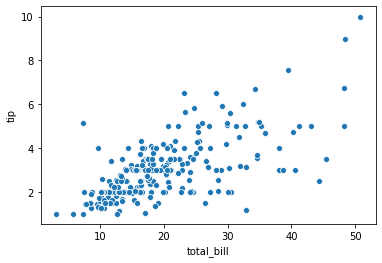

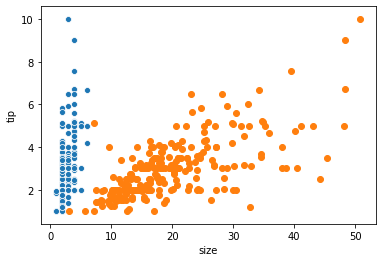

In [28]:
#Scatter plot to see the relationship between total_bill and tip
sns.scatterplot(x="total_bill", y="tip", data=tips_df)
plt.show()
#tip increases as totalbill increases
#Q do we have any other numeric variable in the dataset

sns.scatterplot(x="size", y="tip", data=tips_df)

#we can use matplotlib but here we have to give each column , while in seaboarn we can give derectly df  
plt.scatter(tips_df["total_bill"], tips_df["tip"])
plt.show()


### Line Plot:
* To plot a simple line plot, we use the lineplot method as shown below. 
* We will plot a line between the size and tips.
* Line plot is used to see any trend in the data

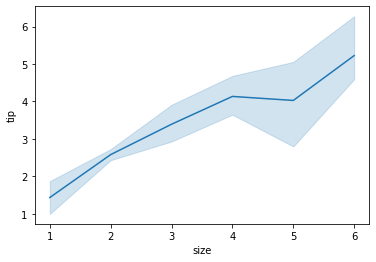

In [29]:
sns.lineplot(x="size", y="tip", data=tips_df)
plt.show()


### Dist Plot/Histogram Plot:(Univariate Analysis)
* The dist plot or distribution plot plots the occurrences or density of the specified feature in the dataset.
* plot the distribution of tips from the dataset.

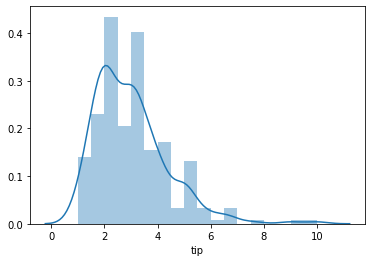

In [34]:
sns.distplot(tips_df['tip'])
plt.show()
# density of each bin is number in the bin divided by total rows


### Bar plot
* A barplot (or barchart) is one of the most common types of graphic.
* It shows the relationship between a numeric and a categoric variable.
* Each entity of the categoric variable is represented as a bar.
* The size of the bar represents its numeric value.

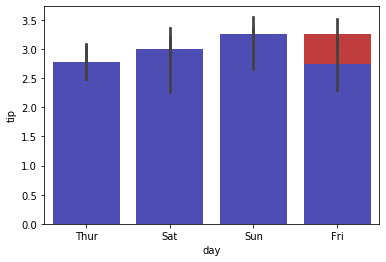

In [46]:
#What is the average tip on each week day?
#x-axis is day and y-axis is average tip on that day)

sns.barplot(x='day',y='tip',data=tips_df)
sns.barplot(x='day',y='tip',data=tips_df, color ='b', saturation=0.4, order= ['Thur', 'Sat', 'Sun', 'Fri'])


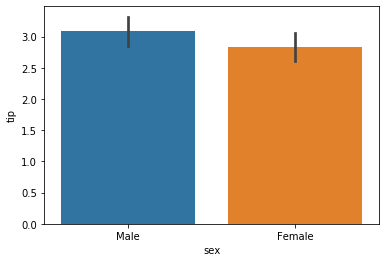

In [51]:
# Draw the barplot of other categorical variable vs tips
sns.barplot(x='sex',y='tip',data=tips_df)

In [52]:
# we need to do a groupby and merger to get the same thing with matplotlib
grouped=tips_df.groupby(['day'], axis=0)   # group by some key
gp=grouped.mean()
print(gp)
#df1= pd.DataFrame({'tip': gp['tip'].values, 'day':['Thur', 'Fri', 'Sat', 'Sun']})
#df1

#plt.bar(df1['day'], df1['tip'], width=0.8, color=['r','g','b',  'y'])
#plt.show()


      total_bill       tip      size
day                                 
Thur   17.682742  2.771452  2.451613
Fri    17.151579  2.734737  2.105263
Sat    20.441379  2.993103  2.517241
Sun    21.410000  3.255132  2.842105


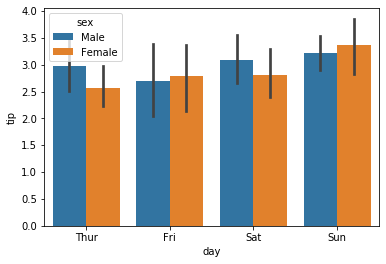

In [61]:
#Daywise tip given by both male and female in 1 graph
#sns.barplot(x='sex',y='tip',hue='day',data=tips_df)

sns.barplot(x='day',y='tip',hue='sex',data=tips_df)
#sns.barplot(x='day',y='tip',data=tips_df, color="r", palette="winter_r")
plt.show()


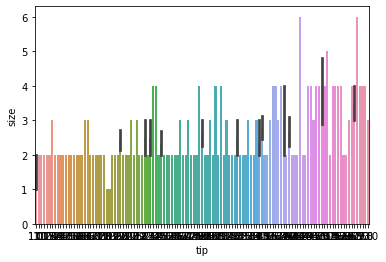

In [79]:
sns.barplot(x='tip',y='size',data=tips_df)

#sns.barplot(x='tip',y='size',data=tips_df,orient='h')
plt.show()

#horizontal bar plot

### Count plot
 * A count plot can be thought of as a histogram across a categorical instead of quantitative variable
 * x-axis has a categorical variable and y-axis has count of each category

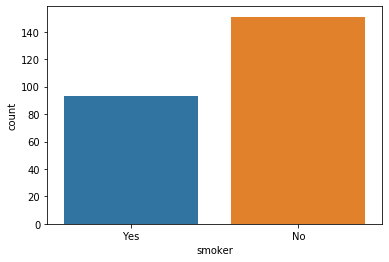

In [6]:
#visualize the number of smokers and non-smokers in the dataset.

sns.countplot(x='smoker',data=tips_df)


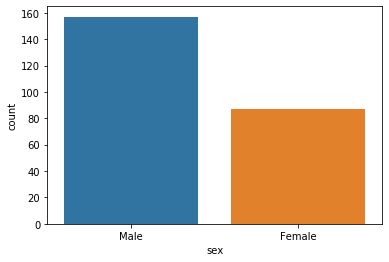

In [8]:
sns.countplot(x='sex',data=tips_df)

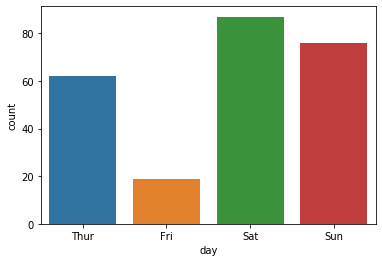

In [9]:
sns.countplot(x='day',data=tips_df)

### Boxplot
* Box plot conveys the distribution of values, the maximum and median values.
* Box plot is used for a numeric variable (univariate Analysis)
* Draw a box plot to show distributions with respect to categories.(Bivariate Analysis)

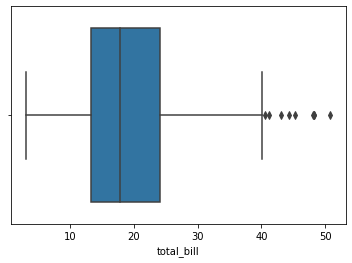

In [13]:
#Univariate Analysis with a boxplot
# Box plot helps you to identify outliers 

sns.boxplot(x='total_bill', data=tips_df)
plt.show()

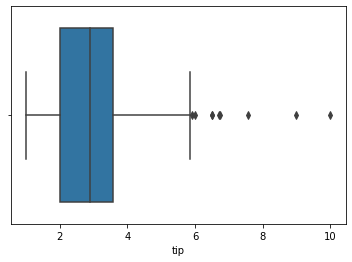

In [14]:
sns.boxplot(x='tip', data=tips_df)
plt.show()

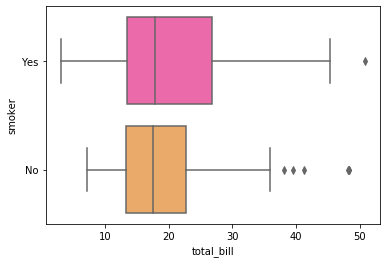

In [20]:
#Bivariate Analysis with a boxplot(Continuous vs Categorical)
#Relationship between categorical and continuous variable 
#Whether there is any relationshipe between  smoking and total bill

sns.boxplot(x='total_bill', y='smoker', data=tips_df, palette='spring')
plt.show()

# since the median line is same for all smokers , there is no relationsheep between smokr and Total_bill

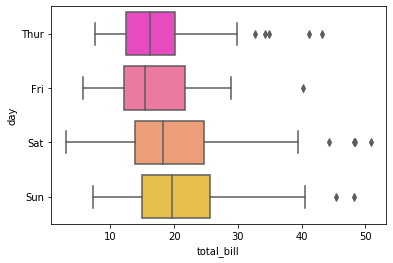

In [21]:
# Any relationship between day and total_bill
sns.boxplot(x='total_bill', y='day', data=tips_df, palette='spring')
plt.show()

# since the median line is not same for all day , there is a relation sheep between day and Total_bill

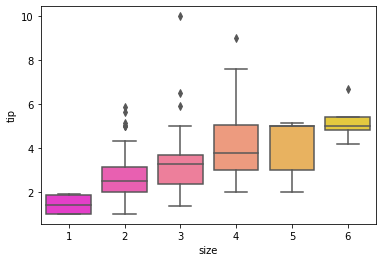

In [25]:
#Is tip related to size
sns.boxplot(x='size', y='tip', data=tips_df, palette='spring')
plt.show()

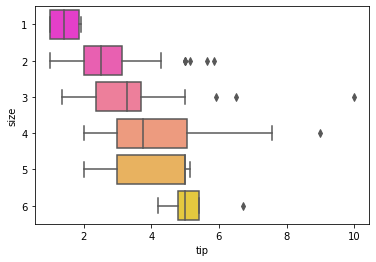

[2 3 4 1 6 5]


In [30]:
sns.boxplot(x='tip', y='size', data=tips_df, palette='spring',orient='h')
plt.show()

print (tips_df['size'].unique())  # hence we ave taken size as categorical variable 
#and  can use x = 'size' and plot boxplot without orient 

# just to summarize, if both variables are numeric and we don't specify orient, 
# by default it takes x axis as categorical and y as continuous


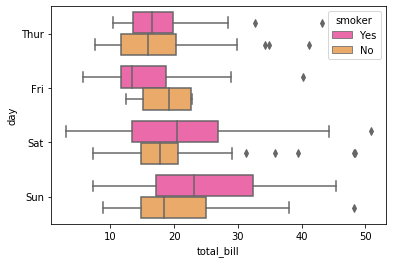

In [32]:
# comparison for smoker/non-smoker for each day total_bills 
sns.boxplot(x='total_bill',y='day',data=tips_df,palette='spring', hue='smoker')


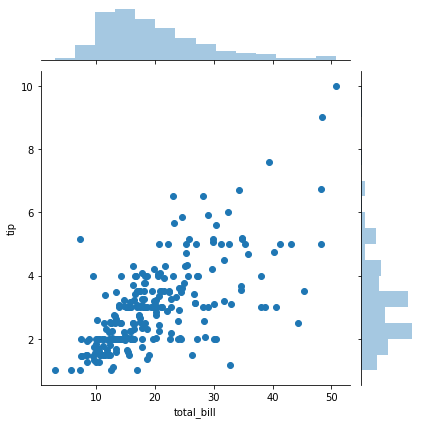

In [34]:
### Joint Plot :
#* The joint plot allows us to draw a plot of two variables with bivariate and univariate graphs.
#* Draw multiple bivariate plots with univariate marginal distributions.
#* We can also specify the kind of plots with the ‘kind’ keyword argument.
#* Kind must be either ‘scatter’, ‘reg’, ‘resid’, or ‘hex’.

sns.jointplot(x='total_bill', y='tip', data=tips_df, kind='scatter')
plt.show()


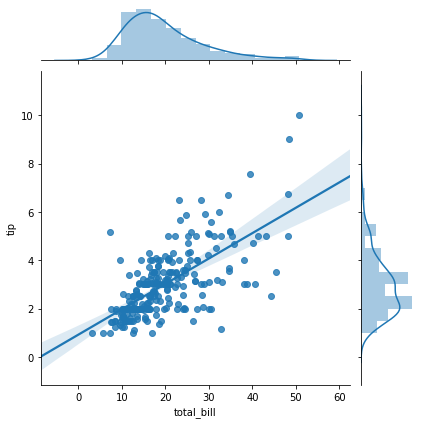

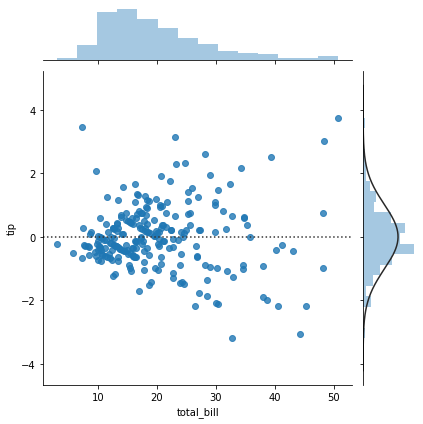

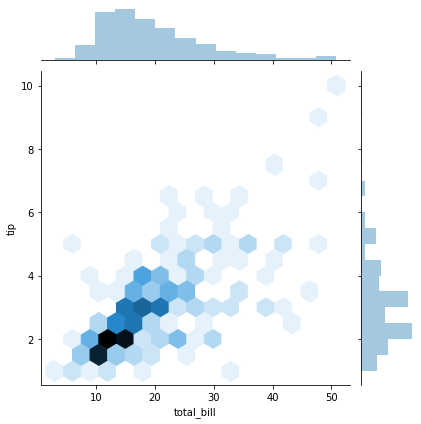

In [38]:
sns.jointplot(x='total_bill', y='tip', data=tips_df, kind='reg')
plt.show()

# Residue here for 50 bill -> 10-6 is my residue 

sns.jointplot(x='total_bill', y='tip', data=tips_df, kind='resid')
plt.show()

# 

sns.jointplot(x='total_bill', y='tip', data=tips_df, kind='hex')
plt.show()

### Pair Plot:
* One of the simplest ways to visualize the relation between all features, the pair plot method.
* plots all the pair relationships in the dataset at once.
* The method takes all the features in the dataset and plots it against each other

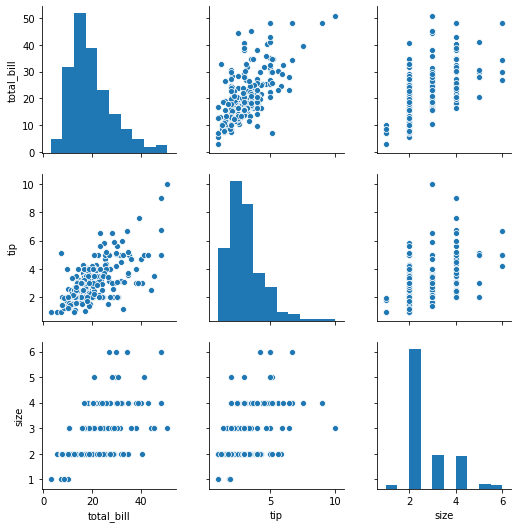

In [39]:
sns.pairplot(tips_df)
plt.show()

In [41]:
###  Correlation with heatmap
### Heatmap helps us to find and visualize correlation between each and every feature

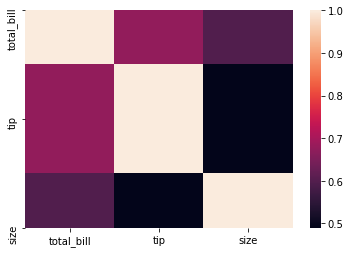

In [44]:
# corelation is between numeric and continuous  features 

#print (tips_df.corr())
sns.heatmap(tips_df.corr())
plt.show()

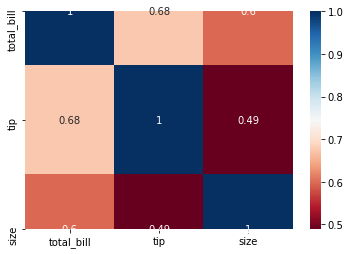

In [49]:
sns.heatmap(tips_df.corr(),annot=True, cmap='RdBu')
plt.show()

# correlation values always lie between -1 to +1 , where we can assume 
#if correlation is above 0.5 its highly corelated where if correlation is below 0.5 we can treat it is less corelated.

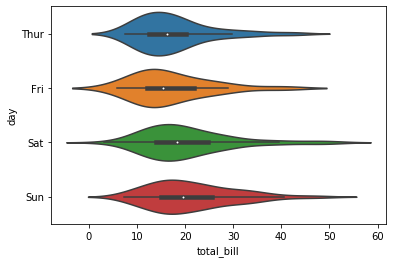

In [52]:
### Violin plot
### *it is a combination of boxplot and kernel density distribution
# relation between numeric and categrial variable 

sns.violinplot(x='total_bill',y='day',data=tips_df)
plt.show()

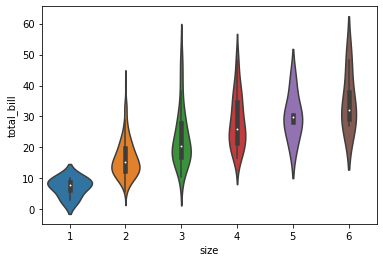

In [55]:
#sns.violinplot(x='tip',y='day',data=tips_df)
sns.violinplot(x='size',y='total_bill',data=tips_df)

# For Continuous Data, We will be using IRIS Dataset

In [61]:
#Importing seaborn Library
import seaborn as sns
import matplotlib.pyplot as plt

#We will be using Iris Dataset for visualisation
iris_df=pd.read_csv("C:\\Users\\Jigar\\Desktop\\Python_DataFolkz\\iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [66]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### he iris dataset contains the following data
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
* The format for the data: (sepal length, sepal width, petal length, petal width)
* Each value we are predicting is the response (also known as: target, outcome, label, dependent
* variable) Classification is supervised learning in which the response is categorical
* "0": setosa
* "1": versicolor
* "2": virginica

In [ ]:
#printing top 5 rows of the dataset and understand the data

### UniVariate Analysis
* Histogram -shows the distribution of each variable in the dataset
* Here the variables are sepal length, sepal width, petal length and petal width
* Histogram groups numbers into ranges . 
* The height of each bar shows how many fall into each range.

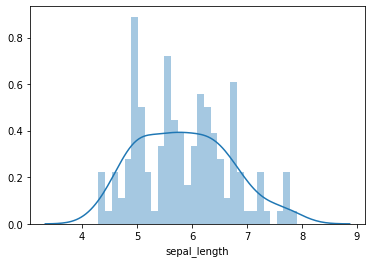

In [76]:
# Draw the Histogram for sepal length using seaborn

sns.distplot(iris_df['sepal_length'],30,kde=True)
plt.show()

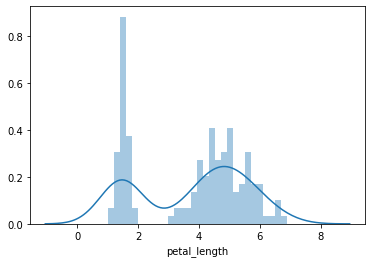

In [79]:
# Plot the distribution followed by petal length and sepal length

sns.distplot(iris_df['petal_length'],30,kde=True)
plt.show()

Text(0.5, 1.0, 'Histogram')

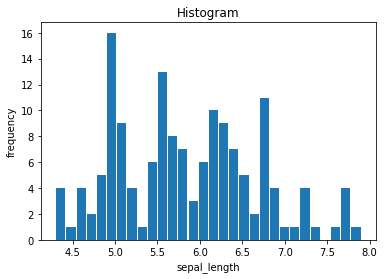

In [83]:
plt.hist(iris_df['sepal_length'], 30,  rwidth = 0.9)
#iris_df['sepal_length'].hist(bins=30)
plt. xlabel('sepal_length')
plt.ylabel('frequency')
plt.title("Histogram")



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B80B93CD08>,
      dtype=object)

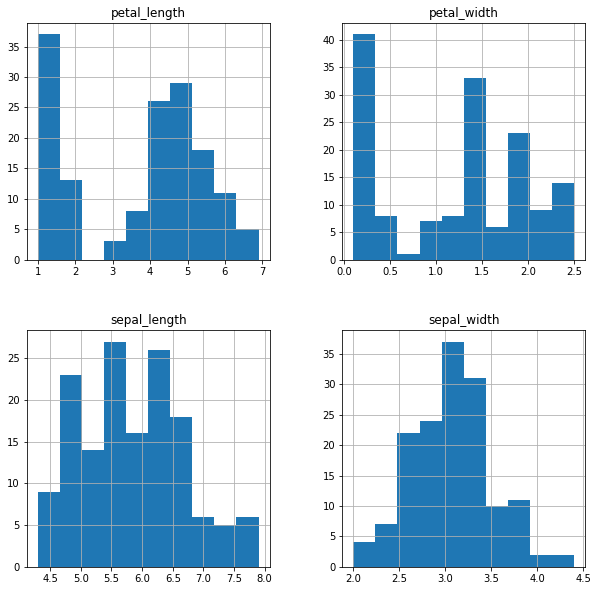

In [92]:
#Draw Histograms for all columns with continuous variables in the  dataset

new = iris_df.drop(['species'],axis=1)
new
new.hist(bins=10,figsize = (10,10))

### Box plot and Whiskers
* The Concept of median, percentile, quantile, whiskers
* A box and whisker plot—also called a box plot—displays the five-number summary of a set of data.
* The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot
* Box plots may also have lines extending from the boxes indicating variability outside the upper and lower quartiles

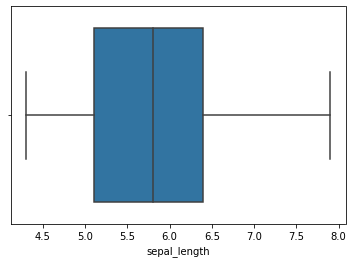

In [98]:
# Draw the boxplot for sepal length

sns.boxplot(x='sepal_length',data=new)
plt.show()

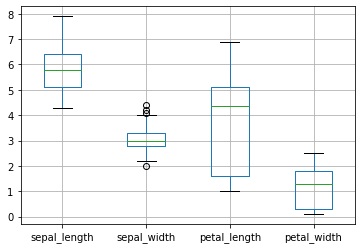

In [102]:
#Draw BoxPlot for all columns with continuous variables in the  dataset
new.boxplot()
plt.show()

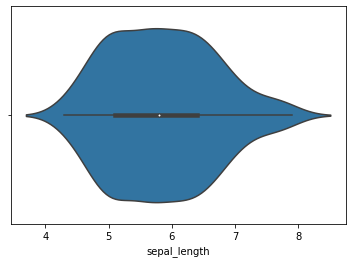

In [112]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot
#Compare the  petal length of different species using a violin plot

#sns.violinplot(x='sepal_length',y='sepal_width',data=new)
sns.violinplot(x='sepal_length',data=new)

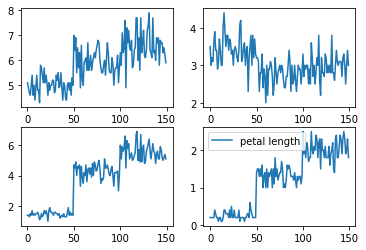

In [114]:
figsize = (16,10)
plt. subplot(2,2,1)
plt.plot(iris_df['sepal_length'], label = 'sepal length')
plt.subplot(2,2,2)
plt.plot(iris_df['sepal_width'], label = 'sepal width')
plt.subplot(2,2,3)
plt.plot(iris_df['petal_length'], label = 'petal length')
plt.subplot(2,2,4)
plt.plot(iris_df['petal_width'], label = 'petal length')
plt.legend()
plt.show()

In [ ]:
#a recap of subplots in a single figure window

# Bivariate Analysis
### 2-D Scatter Plot
* A scatter plot uses dots to represent values for two different numeric variables. 
* The position of each dot on the horizontal and vertical axis indicates values for a data point. 
* Scatter plots are used to observe relationships between variables

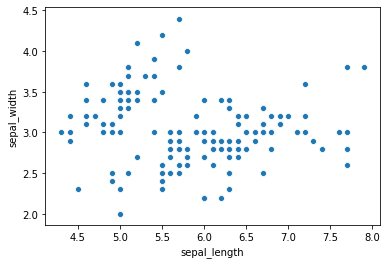

In [125]:
# Draw a scatterplot with sepal_length on x-axis and sepal width on y-axis
sns.scatterplot(x='sepal_length',y='sepal_width',data=new)
plt.show()

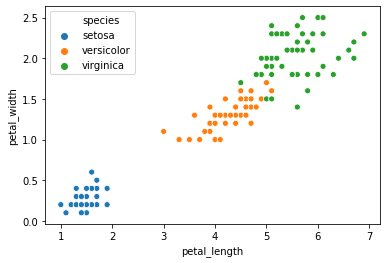

In [128]:
# Draw a scatterplot Taking petal_length on x and petal_width on y
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=iris_df)
plt.show()

In [ ]:
# repeat the above using matplotlib and observe the difference


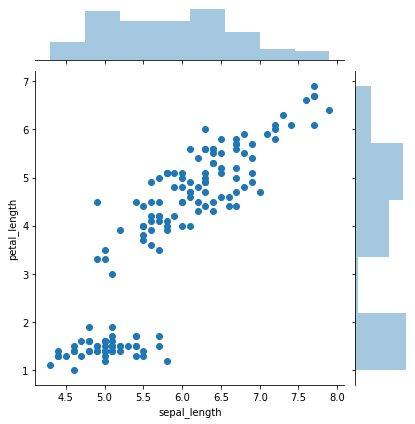

In [133]:
#Draw a jointplot of sepal length and petal length
sns.jointplot(x='sepal_length',y='petal_length',data=iris_df,kind='scatter')
plt.show()

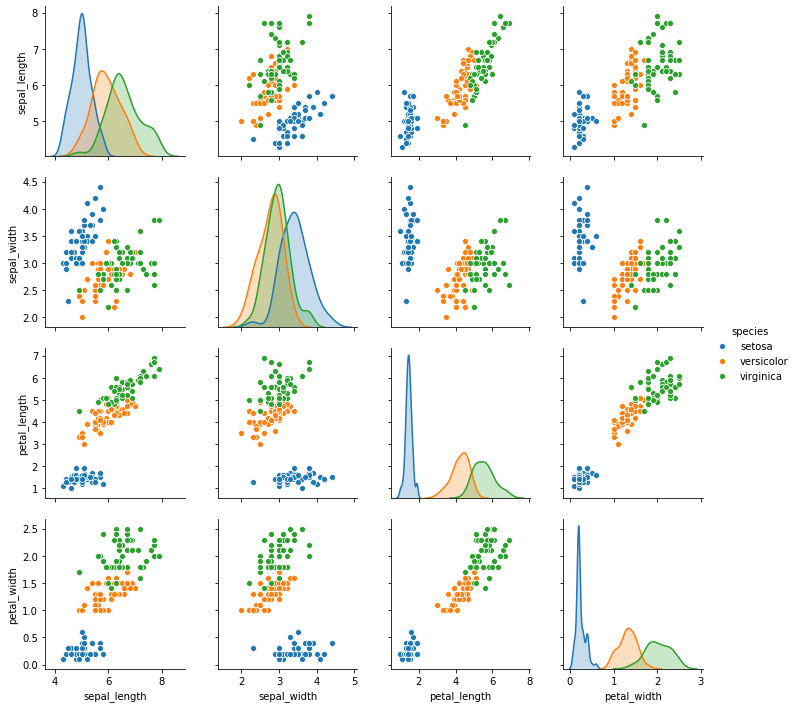

In [137]:
# pairwise scatter plot: Pair-Plot of complete dataset
sns.pairplot(iris_df,hue='species')
plt.show()

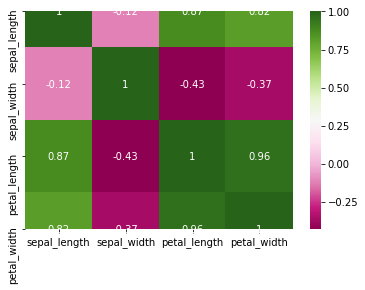

In [143]:
#draw a correlation heatmap of the dataset
sns.heatmap(iris_df.corr(),annot=True,cmap='PiYG')
plt.show()

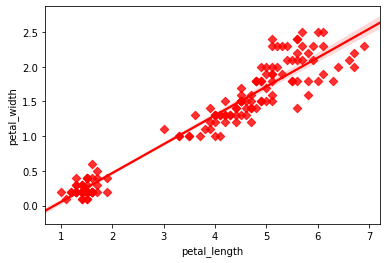

In [147]:
# Draw   a Regression plot of petal length vs petal width
sns.regplot(x= 'petal_length',y='petal_width',data=iris_df,color='red',marker='D')

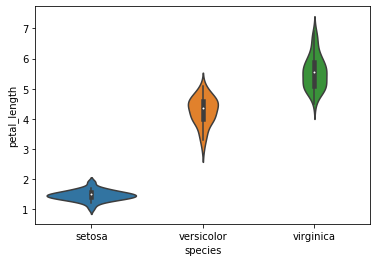

In [151]:
# compare the petal length of different species using a violine plot and boxplot 

sns.violinplot(x='species',y='petal_length',data=iris_df)
plt.show()

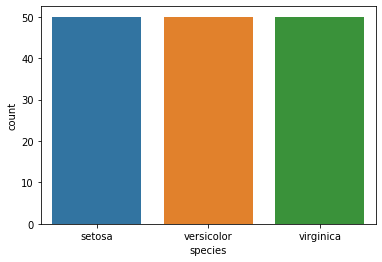

In [154]:
# count plot 
sns.countplot(x='species',data=iris_df)

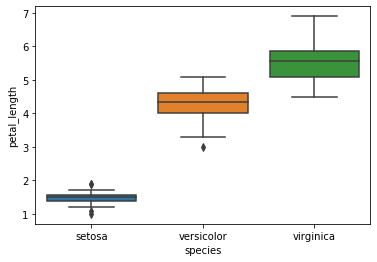

In [155]:
sns.boxplot(x='species',y='petal_length',data=iris_df)

https://www.kite.com/python/docs/matplotlib.pyplot.colormaps

Colormap	Description
BrBG	brown, white, blue-green
PiYG	pink, white, yellow-green
PRGn	purple, white, green
PuOr	orange, white, purple
RdBu	red, white, blue
RdGy	red, white, gray
RdYlBu	red, yellow, blue
RdYlGn	red, yellow, green
Spectral	red, orange, yellow, green, blue
Colormap	Description
Blues	white to dark blue
BuGn	white, light blue, dark green
BuPu	white, light blue, dark purple
GnBu	white, light green, dark blue
Greens	white to dark green
Greys	white to black (not linear)
Oranges	white, orange, dark brown
OrRd	white, orange, dark red
PuBu	white, light purple, dark blue
PuBuGn	white, light purple, dark green
PuRd	white, light purple, dark red
Purples	white to dark purple
RdPu	white, pink, dark purple
Reds	white to dark red
YlGn	light yellow, dark green
YlGnBu	light yellow, light green, dark blue
YlOrBr	light yellow, orange, dark brown
YlOrRd	light yellow, orange, dark red
